<a href="https://colab.research.google.com/github/LucasLeonam/DataScience/blob/master/Aula_01_QuarentenaDados_Filmes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
avaliacoes = pd.read_csv('https://github.com/LucasLeonam/DataScience/blob/master/Alura%20-%20QuarentenaDados/movies_sample/ratings.csv?raw=true')
filmes = pd.read_csv('https://raw.githubusercontent.com/LucasLeonam/DataScience/master/Alura%20-%20QuarentenaDados/movies_sample/movies.csv')

In [3]:
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
print(avaliacoes.shape)
print(filmes.shape)

(100836, 4)
(9742, 3)


In [0]:
avaliacoes.columns= ['usuarioID', 'filmeId', 'nota', 'momento']
filmes.columns= ['filmeId', 'titulo', 'genero']

In [7]:
avaliacoes.head()

,usuarioID,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
avaliacoes.query("filmeId == 1")

,usuarioID,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [9]:
avaliacoes.describe()

,usuarioID,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [10]:
notas_medias_por_filme = avaliacoes.groupby('filmeId').mean()['nota']
notas_medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [11]:
filmes_com_media = filmes.join(notas_medias_por_filme, on='filmeId')
filmes_com_media.head()

,filmeId,titulo,genero,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [12]:
filmes_com_media.sort_values("nota", ascending=False)

,filmeId,titulo,genero,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN


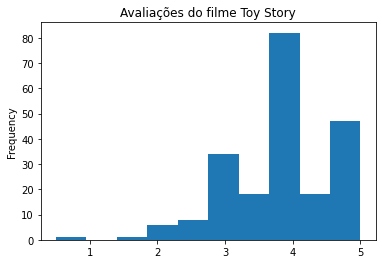

In [13]:
avaliacoes.query("filmeId == 1")['nota'].plot(kind='hist', title = 'Avaliações do filme Toy Story')
plt.show()

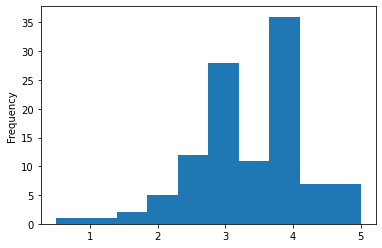

In [14]:
avaliacoes.query("filmeId == 2")['nota'].plot(kind='hist')

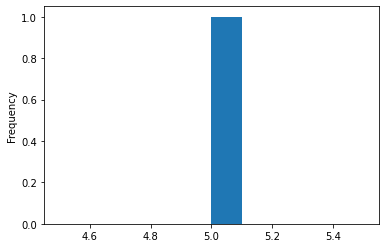

In [15]:
avaliacoes.query("filmeId == 102084")['nota'].plot(kind='hist')

# Desafio 1

Apresentar os filmes que não receberam notas

In [16]:
# Criação da variável ' desafio1 ' para utilização neste exercício.
desafio1 = filmes_com_media

# Substituição de todos os valores NaN da coluna ' nota ' por -1.
desafio1["nota"] = desafio1["nota"].fillna(-1)

# Pesquisa de todos os filmes com a ' nota ' igual a -1 ( Ou seja, todos os filmes que não possuem notas atribuídas).
desafio1.query("nota == -1")

,filmeId,titulo,genero,nota
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,-1.0
2211,2939,Niagara (1953),Drama|Thriller,-1.0
2499,3338,For All Mankind (1989),Documentary,-1.0
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,-1.0
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,-1.0
4037,5721,"Chosen, The (1981)",Drama,-1.0
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,-1.0
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,-1.0
4704,7020,Proof (1991),Comedy|Drama|Romance,-1.0
5020,7792,"Parallax View, The (1974)",Thriller,-1.0


# Desafio 2
Mudar o nome da coluna 'nota' para 'media' após o join

In [17]:
# Criação da variável ' desafio2 ' recebendo o resultado do Desafio 1, para trabalharmos de forma contínua.
desafio2 = desafio1.copy()

# Aqui, usarei o método ' rename ' do Pandas para substituir o nome da coluna ' nota ' para ' media '.
# Utilizando o parâmetro ' inplace = True ', eu faço a alteração e já salvo diretamente na mesma variável que estou trabalhando, sem a necessidade de atribuir este resultado a outra variável.
desafio2.rename(columns={"nota":"media"}, inplace=True)
desafio2.head()

,filmeId,titulo,genero,media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


# Desafio 3

Colocar o número de avaliações que cada filme recebeu

In [18]:
# Criação da variável ' desafio3 ' recebendo o resultado do Desafio 2, para trabalharmos de forma contínua.
desafio3 = desafio2.copy()

# Criação de uma variável para receber o ' groupby ' de ' filmeId ' trazendo apenas a coluna ' nota '.
avaliacoes3 = avaliacoes.groupby("filmeId")["nota"].count()

# Efetuando JOIN das variáveis ' desafio3 ' e ' avaliacoes3 '.
desafio3 = desafio3.join(avaliacoes3, on = 'filmeId')

# Efetuando um SORT para verificar se existem valores NaN.
print(desafio3.sort_values("nota", ascending = False))

# Substituindo os valores NaN por -1 e alterando o nome da coluna ' nota ' para ' qtdeVotos '
desafio3["nota"] = desafio3["nota"].fillna(-1)
desafio3.rename(columns={"nota":"qtdeVotos"}, inplace = True)
desafio3.sort_values("qtdeVotos", ascending = False)

      filmeId                              titulo  ...     media   nota
314       356                 Forrest Gump (1994)  ...  4.164134  329.0
277       318    Shawshank Redemption, The (1994)  ...  4.429022  317.0
257       296                 Pulp Fiction (1994)  ...  4.197068  307.0
510       593    Silence of the Lambs, The (1991)  ...  4.161290  279.0
1939     2571                  Matrix, The (1999)  ...  4.192446  278.0
...       ...                                 ...  ...       ...    ...
5749    30892  In the Realms of the Unreal (2004)  ... -1.000000    NaN
5824    32160            Twentieth Century (1934)  ... -1.000000    NaN
5837    32371           Call Northside 777 (1948)  ... -1.000000    NaN
5957    34482        Browning Version, The (1951)  ... -1.000000    NaN
7565    85565                  Chalet Girl (2011)  ... -1.000000    NaN

[9742 rows x 5 columns]


,filmeId,titulo,genero,media,qtdeVotos
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.164134,329.0
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.429022,317.0
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.197068,307.0
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.161290,279.0
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.192446,278.0
...,...,...,...,...,...
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,-1.000000,-1.0
5957,34482,"Browning Version, The (1951)",Drama,-1.000000,-1.0
5421,25855,"Roaring Twenties, The (1939)",Crime|Drama|Thriller,-1.000000,-1.0
7565,85565,Chalet Girl (2011),Comedy|Romance,-1.000000,-1.0


# Desafio 4

Arredondar as médias (coluna de nota média) para duas casas decimais.

In [19]:
# Criação da variável ' desafio4 ' recebendo o resultado do Desafio 3, para trabalharmos de forma contínua.
desafio4 = desafio3.copy()

# Utilizando o método ' round() ' para arredondar os valores. Utilizado o parâmetro ' decimals = 2 ' para definir o arredondamento para 2 casa decimais.
desafio4["media"] = desafio4["media"].round(decimals = 2)
desafio4

,filmeId,titulo,genero,media,qtdeVotos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.00,1.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.50,1.0
9739,193585,Flint (2017),Drama,3.50,1.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.50,1.0


# Desafio 5

Descobrir os gêneros dos filmes (quais são eles, únicos)

In [20]:
# Criação da variável ' desafio5 ' recebendo o resultado do Desafio 4, para trabalharmos de forma contínua.
desafio5 = desafio4.copy()

# Substituindo o pipe ( | ) por vírgula ( , ) utilizando o método str.split(pat = "|").
desafio5["genero"] = desafio5["genero"].str.split(pat = "|")

# Criando duas listas, uma para receber os valores únicos, e outra para receber todos os valores.
generos_unicos = []
generos_total = []

# Função para localizar os generos e popular nas variáveis.
def listar_unicos(generos):
  for genero in generos:
    if genero not in generos_unicos:
      generos_unicos.append(genero)
    generos_total.append(genero)

# Não sei o que isso faz, só copiei de alguém.
desafio5['genero'].apply(listar_unicos)

# Transformando ambas as variáveis criadas em Series, para que seja possível utilizar as funções do Pandas.
generos_unicos = pd.Series(generos_unicos)
generos_total = pd.Series(generos_total)

# Valores exclusivos, conforme solicitado no Desafio.
generos_unicos

## Valores totais, que serão utilizados no Desafio 6.
##generos_total

0              Adventure
1              Animation
2               Children
3                 Comedy
4                Fantasy
5                Romance
6                  Drama
7                 Action
8                  Crime
9               Thriller
10                Horror
11               Mystery
12                Sci-Fi
13                   War
14               Musical
15           Documentary
16                  IMAX
17               Western
18             Film-Noir
19    (no genres listed)
dtype: object

# Desafio 6

Contar o número de aparições de cada gênero

In [21]:
# Utilizando a função ' value_counts() ' para contar cantar vezes o valor aparece. Esta é uma função do Pandas e só pode ser utilizado em uma Series, Dataframe ou um objeto de 3 ou mais dimensões.
generos_total.value_counts()

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

# Desafio 7

Plotar o gráfico de aparições pór gênero. Pode ser um gráfico de tipo igual a barra.

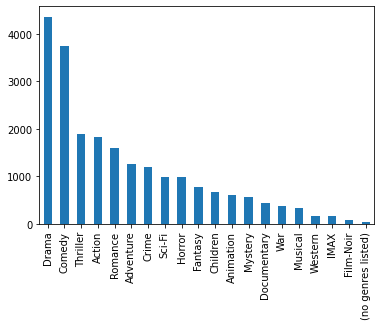

In [22]:
generos_total.value_counts().plot(kind = "bar")